In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
os.chdir('/workspace/plane-nerf')
DATA_PATH = "/workspace/plane-nerf/data/jackal_floor_synthetic_data"
BACKGROUND_IMG = "/workspace/plane-nerf/data/background.png"

if not os.path.exists(os.path.join(DATA_PATH, "background_images")):
    os.makedirs(os.path.join(DATA_PATH, "background_images"))

with open(os.path.join(DATA_PATH, "transforms.json")) as f:
    transforms = json.load(f)

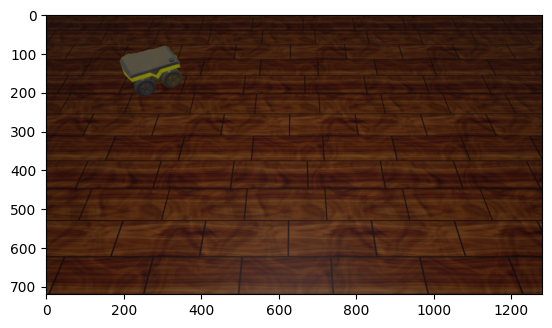

In [9]:
background = Image.open(BACKGROUND_IMG)

for i in range(len(transforms["frames"])):
    f = transforms["frames"][i]
    
    img = Image.open(os.path.join(DATA_PATH, f["file_path"]))
    img = img.convert("RGB")
    img = np.array(img)

    mask = Image.open(os.path.join(DATA_PATH, f["mask_path"]))
    mask = np.array(mask)

    new_img = copy.deepcopy(background)
    new_img.paste(Image.fromarray(img), (0, 0), Image.fromarray(mask))

    new_img.save(os.path.join(DATA_PATH, "background_images", f"{i}.png"))

plt.imshow(new_img)
